In [86]:
import numpy as np
import pandas as pd

In [5]:
train = pd.read_csv('train.csv')

In [214]:
test = pd.read_csv('test.csv')

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Lets investigate all the columns that don't are not included in most rows just to get a feel for what they are

In [9]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [10]:
train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [11]:
train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [12]:
train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

Lets now look at the sales price since that is our main predictive objective

In [13]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

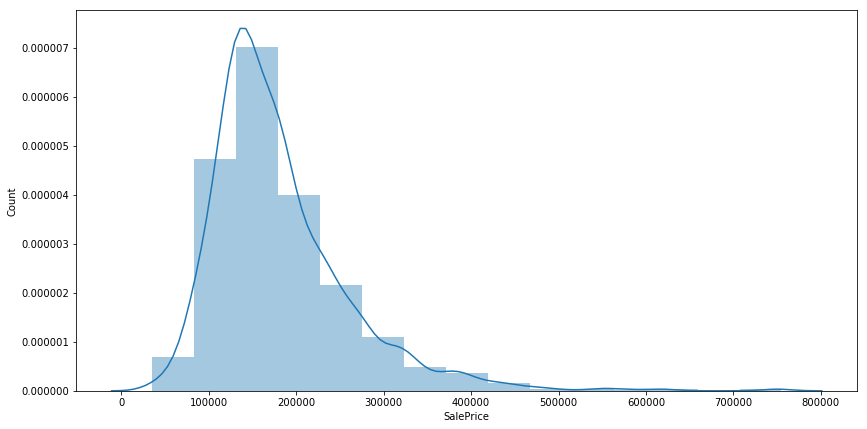

In [21]:
plt.figure(figsize=(14,7))
plt.ylabel('Count')
sns.distplot(train['SalePrice'],bins=15,)

Recall skewness measures how symmetric our histogram is.  Obviously this one is not very symmetric, lets get a measure on it anyways.

Kurtosis is how 'pointy' our distribution is compared to a normal bell curve.  Positive means pointy, negative means flat, 0 means bell curve.

It looks like from our histogram we have a few outliers who are above $500,000.  Lets examinine them a little more.

In [16]:
#skewness and kurtosis
print("Skewness: %f" %train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Lets see if we can find some variables that correlate nicely with sales price.

In [32]:
def make_num_corr_graph(df,var1,var2):
    data = pd.concat([df[var1], df[var2]], axis=1)
    data.plot.scatter(x=var2, y=var1, ylim=(0,800000))

In [44]:
def make_category_corr_graph(df,var1,var2):
    data = pd.concat([df[var1],df[var2]],axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var2, y=var1, data=data)
    fig.axis(ymin=0, ymax=800000);

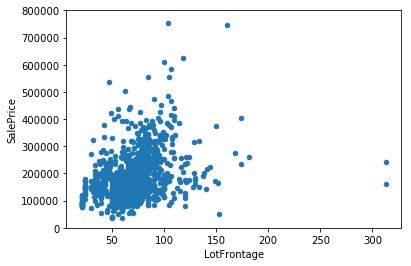

In [45]:
make_num_corr_graph(train,'SalePrice','LotFrontage')

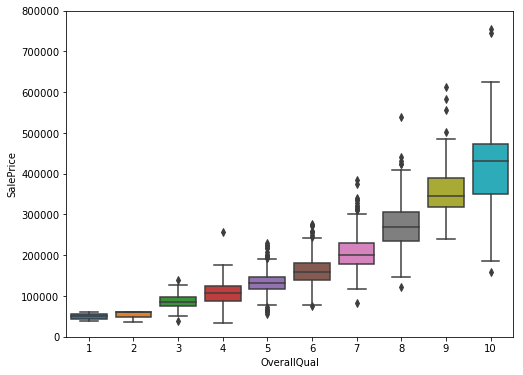

In [46]:
make_category_corr_graph(train,'SalePrice','OverallQual')

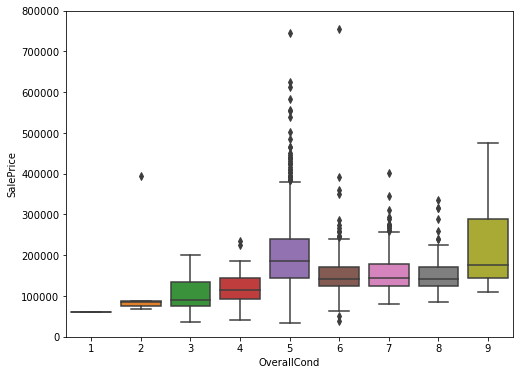

In [50]:
make_category_corr_graph(train,'SalePrice','OverallCond')

Lets use seaborn and find what correlates most with what else

In [51]:
corrmatrix = train.corr()

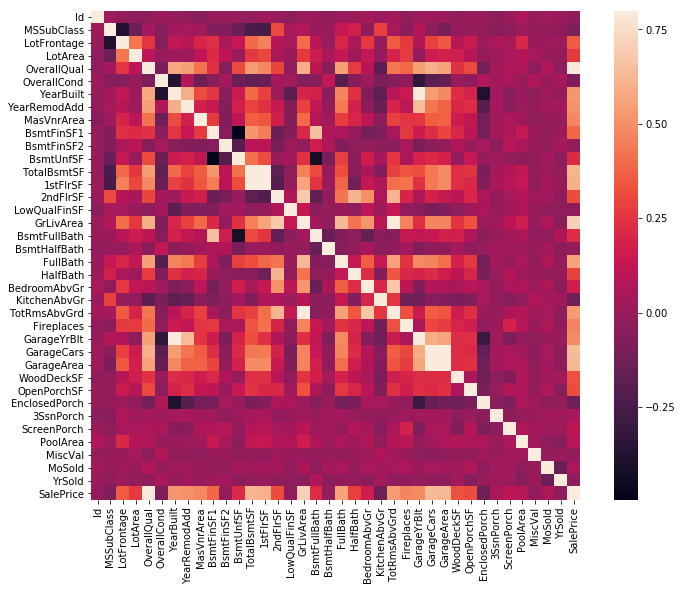

In [54]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

In [100]:
#Top 5 correlating factors
corrmatrix.nlargest(5,'SalePrice')['SalePrice']

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [113]:
#Put this in a helper file, most likely useful in future
def correlated_by_at_least_k(corrmatrix,columnname,k=.5):
    return corrmatrix[np.logical_or(corrmatrix[columnname]<-k, corrmatrix[columnname]>k)][columnname].sort_values(ascending=False)

Lets investigate if there are any other factors that have a higher than .5 correlation with Sale Price

In [114]:
print(correlated_by_at_least_k(corrmatrix,'SalePrice'))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [117]:
cols_to_feature = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']

In [118]:
train_subset = train[cols_to_feature]

In [120]:
train_subset.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt
0,7,1710,2,856,2,8,2003
1,6,1262,2,1262,2,6,1976
2,7,1786,2,920,2,6,2001
3,7,1717,3,756,1,7,1915
4,8,2198,3,1145,2,9,2000


In [121]:
train_subset.shape

(1460, 7)

In [151]:
train['SalePrice'].value_counts().count()

663

In [123]:
import tensorflow as tf

In [142]:
quality = tf.feature_column.categorical_column_with_hash_bucket('OverallQual',hash_bucket_size=10)
livingarea = tf.feature_column.numeric_column('GrLivArea')
garage = tf.feature_column.categorical_column_with_hash_bucket('GarageCars',hash_bucket_size=5)
basement = tf.feature_column.numeric_column('TotalBsmtSF')
full_baths = tf.feature_column.categorical_column_with_hash_bucket('FullBath',hash_bucket_size=4)
rooms = tf.feature_column.categorical_column_with_hash_bucket('TotRmsAbvGrd',hash_bucket_size=12)
year_built = tf.feature_column.numeric_column('YearBuilt')

In [143]:
x_data = train_subset

In [158]:
x_data.FullBath = x_data.FullBath.astype(str)

C:\Users\karab\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [169]:
x_data.GarageCars = x_data.GarageCars.astype(str)

C:\Users\karab\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [180]:
x_data.OverallQual = x_data.OverallQual.astype(str)

C:\Users\karab\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [192]:
x_data.TotRmsAbvGrd = x_data.TotRmsAbvGrd.astype(str)

C:\Users\karab\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [193]:
x_data.FullBath

0       2
1       2
2       2
3       1
4       2
5       1
6       2
7       2
8       2
9       1
10      1
11      3
12      1
13      2
14      1
15      1
16      1
17      2
18      1
19      1
20      3
21      1
22      2
23      1
24      1
25      2
26      1
27      2
28      1
29      1
       ..
1430    2
1431    2
1432    2
1433    2
1434    2
1435    1
1436    1
1437    2
1438    1
1439    2
1440    2
1441    1
1442    2
1443    1
1444    2
1445    1
1446    1
1447    2
1448    1
1449    1
1450    2
1451    2
1452    1
1453    1
1454    2
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1460, dtype: object

In [194]:
labels = train['SalePrice']

In [195]:
x_data.shape

(1460, 7)

In [196]:
labels.shape

(1460,)

In [197]:
feat_cols = [quality,livingarea,garage,basement,full_baths,rooms,year_built]

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=.15)

In [203]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,
                                                 batch_size=64,num_epochs=1000,
                                                 shuffle=True)

In [204]:
linear_model = tf.estimator.LinearRegressor(feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_tf_random_seed': 1, '_model_dir': 'C:\\Users\\karab\\AppData\\Local\\Temp\\tmpp6p5865l'}


In [209]:
linear_model.train(input_func,steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpp6p5865l\model.ckpt-20000
INFO:tensorflow:Saving checkpoints for 20001 into C:\Users\karab\AppData\Local\Temp\tmpp6p5865l\model.ckpt.
INFO:tensorflow:loss = 1.63462e+11, step = 20001
INFO:tensorflow:global_step/sec: 403.097
INFO:tensorflow:loss = 2.40101e+11, step = 20101 (0.248 sec)
INFO:tensorflow:global_step/sec: 436.223
INFO:tensorflow:loss = 1.79116e+11, step = 20201 (0.245 sec)
INFO:tensorflow:global_step/sec: 417.982
INFO:tensorflow:loss = 2.25981e+11, step = 20301 (0.224 sec)
INFO:tensorflow:global_step/sec: 482.813
INFO:tensorflow:loss = 1.0138e+11, step = 20401 (0.207 sec)
INFO:tensorflow:global_step/sec: 463.142
INFO:tensorflow:loss = 1.52848e+11, step = 20501 (0.216 sec)
INFO:tensorflow:global_step/sec: 445.543
INFO:tensorflow:loss = 2.67398e+11, step = 20601 (0.224 sec)
INFO:tensorflow:global_step/sec: 444.541
INFO:tensorflow:loss = 3.60386e+11, step =

INFO:tensorflow:global_step/sec: 330.916
INFO:tensorflow:loss = 2.68574e+11, step = 27901 (0.301 sec)
INFO:tensorflow:global_step/sec: 312.36
INFO:tensorflow:loss = 1.20919e+11, step = 28001 (0.323 sec)
INFO:tensorflow:global_step/sec: 297.529
INFO:tensorflow:loss = 3.29776e+11, step = 28101 (0.337 sec)
INFO:tensorflow:global_step/sec: 306.628
INFO:tensorflow:loss = 2.2476e+11, step = 28201 (0.325 sec)
INFO:tensorflow:global_step/sec: 368.364
INFO:tensorflow:loss = 2.42379e+11, step = 28301 (0.267 sec)
INFO:tensorflow:global_step/sec: 463.89
INFO:tensorflow:loss = 3.1786e+11, step = 28401 (0.216 sec)
INFO:tensorflow:global_step/sec: 481.854
INFO:tensorflow:loss = 1.86712e+11, step = 28501 (0.204 sec)
INFO:tensorflow:global_step/sec: 462.057
INFO:tensorflow:loss = 1.8464e+11, step = 28601 (0.216 sec)
INFO:tensorflow:global_step/sec: 277.78
INFO:tensorflow:loss = 2.09114e+11, step = 28701 (0.367 sec)
INFO:tensorflow:global_step/sec: 285.663
INFO:tensorflow:loss = 2.94779e+11, step = 2880

In [207]:
eval_input_func  = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                      batch_size=10,num_epochs=1,
                                                      shuffle=False)

In [210]:
linear_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-28-17:55:31
INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpp6p5865l\model.ckpt-30000
INFO:tensorflow:Finished evaluation at 2018-07-28-17:55:32
INFO:tensorflow:Saving dict for global step 30000: average_loss = 3.23548e+09, global_step = 30000, loss = 3.22077e+10


{'average_loss': 3.2354752e+09, 'global_step': 30000, 'loss': 3.2207686e+10}

In [224]:
predict = test[cols_to_feature]

In [225]:
predict.FullBath = predict.FullBath.astype(str)
predict.GarageCars = predict.GarageCars.astype(str)
predict.OverallQual = predict.OverallQual.astype(str)
predict.TotRmsAbvGrd = predict.TotRmsAbvGrd.astype(str)

C:\Users\karab\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [226]:
predict.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt
0,5,896,1.0,882.0,1,5,1961
1,6,1329,1.0,1329.0,1,6,1958
2,5,1629,2.0,928.0,2,6,1997
3,6,1604,2.0,926.0,2,7,1998
4,8,1280,2.0,1280.0,2,5,1992


In [227]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=predict,
                                                      batch_size=10,num_epochs=1,
                                                      shuffle=False)

In [233]:
pred = linear_model.predict(pred_input_func)

In [234]:
to_export =[]

for i in pred:
    to_export.append(i['predictions'][0])

INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpp6p5865l\model.ckpt-30000


In [246]:
len(to_export)

1459

In [256]:
export_table = pd.DataFrame()

In [257]:
export_table['Id'] = range(1461,1461+1459)

In [258]:
export_table['SalePrice'] = to_export

In [259]:
pd.expo

1459